In [2]:
from __future__ import division
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from math import ceil
from math import sqrt
%matplotlib inline

In [3]:
df=pd.read_csv('NFL 2016.csv', sep=',',header=None, low_memory=False)

In [95]:
#Degree 1 line of best fit
def best_fit(X, Y):

    xbar = sum(X)/len(X)
    ybar = sum(Y)/len(Y)
    n = len(X) # or len(Y)

    numer = sum([xi*yi for xi,yi in zip(X, Y)]) - n * xbar * ybar
    denum = sum([xi**2 for xi in X]) - n * xbar**2

    b = numer / denum
    a = ybar - b * xbar

    return a, b

In [88]:
#Graphing function by game
def graph_by_game(how_many_games, data_set, sup_title, penalties = False, color="b"):
    plt.figure(figsize=(30,how_many_games*9))
    for i in xrange(how_many_games):     
        plt.subplot(how_many_games, 3,i+1)
        this_game = data_set[all_games[i]+1:all_games[i+1]]
        these_penalties = penalty[all_games[i]+1:all_games[i+1]]
        x1=np.linspace(0,len(this_game),len(this_game))
        plt.plot(x1, this_game, color, lw=2.0)
        if penalties:
            for j in xrange(len(these_penalties)):
                if these_penalties[j]==1:
                    plt.plot(x1[j],this_game[j],"yo", markersize=12)
        #Yard Lines
        plt.plot(x1, x1*0, "k", alpha=.5)
        plt.plot(x1, x1/x1*(-25), "k", alpha=.5)
        plt.plot(x1, x1/x1*(25), "k", alpha=.5)
        
    #Final Graph Stuff
    plt.suptitle(sup_title, fontsize=50, weight="bold")
    plt.tight_layout()
    plt.subplots_adjust(top=.975)
    plt.show()

In [103]:
#A graphing function that can change colors based on some criterion
def color_graph():
    A=np.array([1,2,3,4,5,6,7,8,9,10,9,8,7,6,5,4,3,2,1])
    x=np.linspace(0,len(A),len(A))
    for i in xrange(len(A)):
        if A[i]>5:
            plt.plot(x[i],A[i],"ro")
        else:
            plt.plot(x[i],A[i],"bo") #It works with a scatter plot, but not with a line plot...
    plt.show()
    return

In [4]:
#Get our array of values
nfl_data = df.values


#How many games are there?
game_id = nfl_data[1:,0]
number_of_games = len(set(game_id))

#We want the time values during each game
quarter = nfl_data[:,2]
quarter = [int(quarter[i]) for i in xrange(1,len(quarter))]

minute = nfl_data[:,3]
minute = [int(minute[i]) for i in xrange(1,len(minute))]

second = nfl_data[:,4]
second = [int(second[i]) for i in xrange(1,len(second))]

#Penalties
penalty_index = list(nfl_data[0]).index("IsPenalty")
penalty = list(nfl_data[1:,penalty_index])
penalty = [int(i) for i in penalty]

#Yards, Pass, Rush
yardind = list(nfl_data[0]).index("Yards")
yards = nfl_data[1:,yardind]
yards = [int(i) for i in yards]

passind = list(nfl_data[0]).index("IsPass")
ispass = nfl_data[1:,passind]
ispass = [int(i) for i in ispass]

rushind = list(nfl_data[0]).index("IsRush")
isrush = nfl_data[1:,rushind]
isrush = [int(i) for i in isrush]

#Yard line
yardind = list(nfl_data[0]).index("YardLine")
yard = nfl_data[1:,yardind]
yard = [int(i)-50 for i in yard]


In [7]:
#Now we want a function for how long has passed.
time_elapsed = np.zeros_like(second)
for i in xrange(len(second)):
    if second[i]!=0:
        time_elapsed[i] = (quarter[i]-1)*15*60 + (14-minute[i])*60 + (60-second[i])
    else:
        time_elapsed[i] = (quarter[i]-1)*15*60 + (15-minute[i])*60



#Get the indices for when one game ends, new begins
all_games=list()

for i in xrange(len(game_id)-1):
    if game_id[i+1]!=game_id[i]:
        all_games.append(i)

#Get the number of plays per game
plays = list()
for i in xrange(len(all_games)-1):
    plays.append(all_games[i+1]-all_games[i])

# Analysis of Penalties and Direction of Play

The blue line tracks the ball movement, from goal line to goal line, as a function of time. The yellow dots represent penalties called.

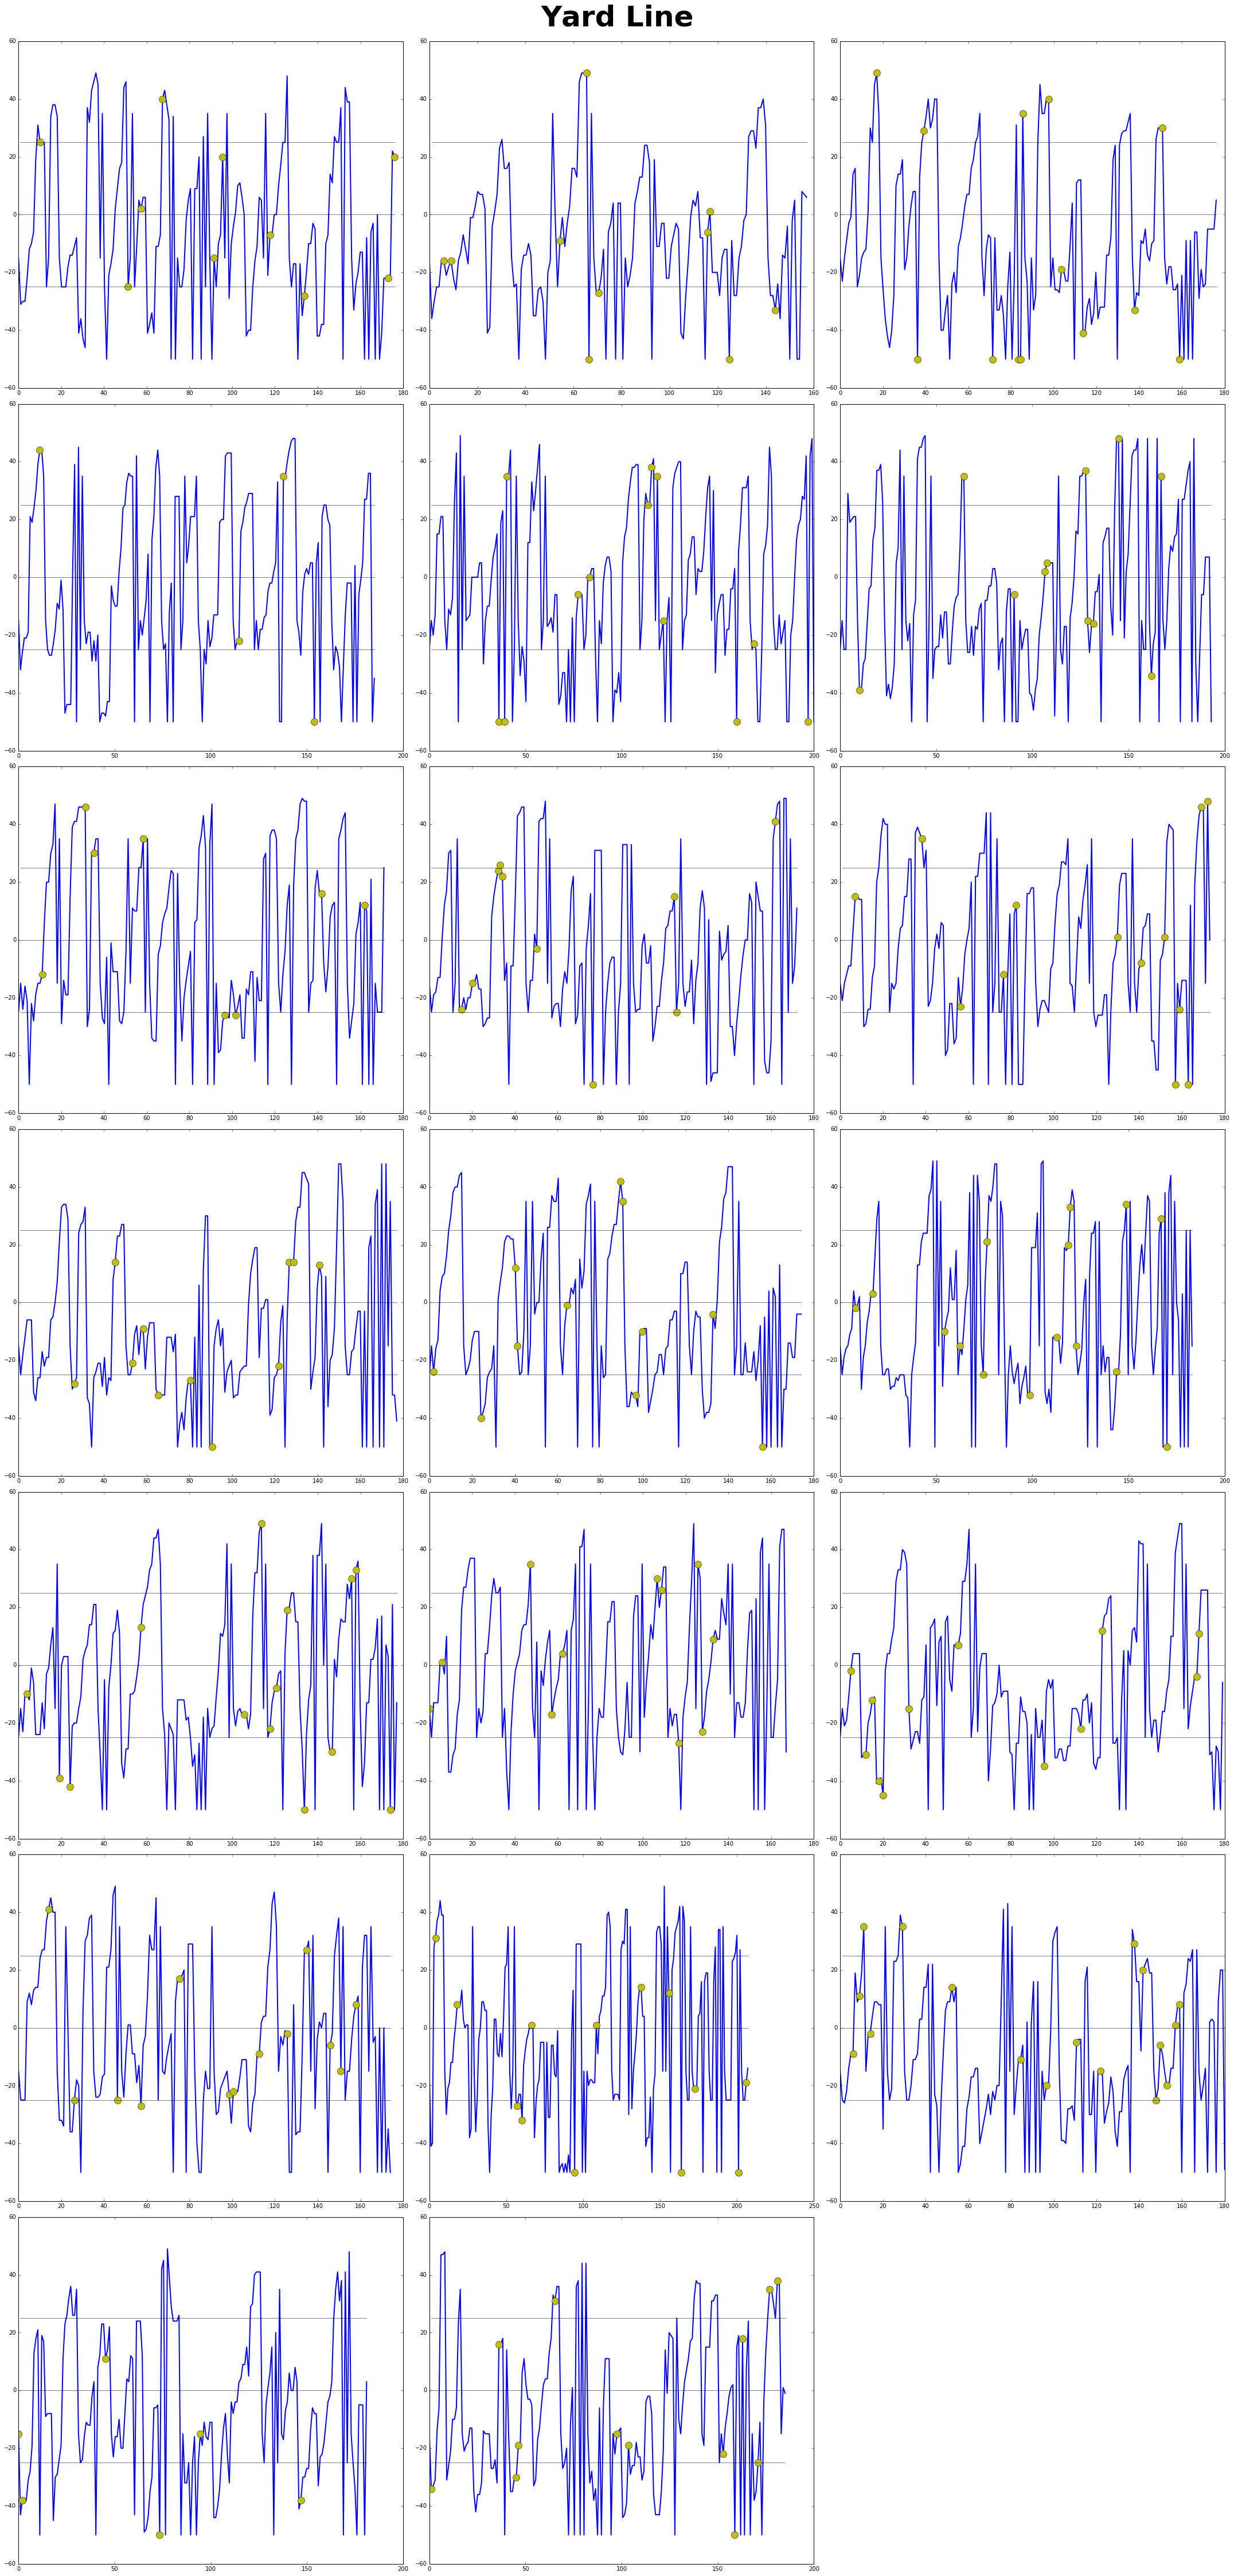

In [89]:
graph_by_game(20, yard, "Yard Line", penalties=True)

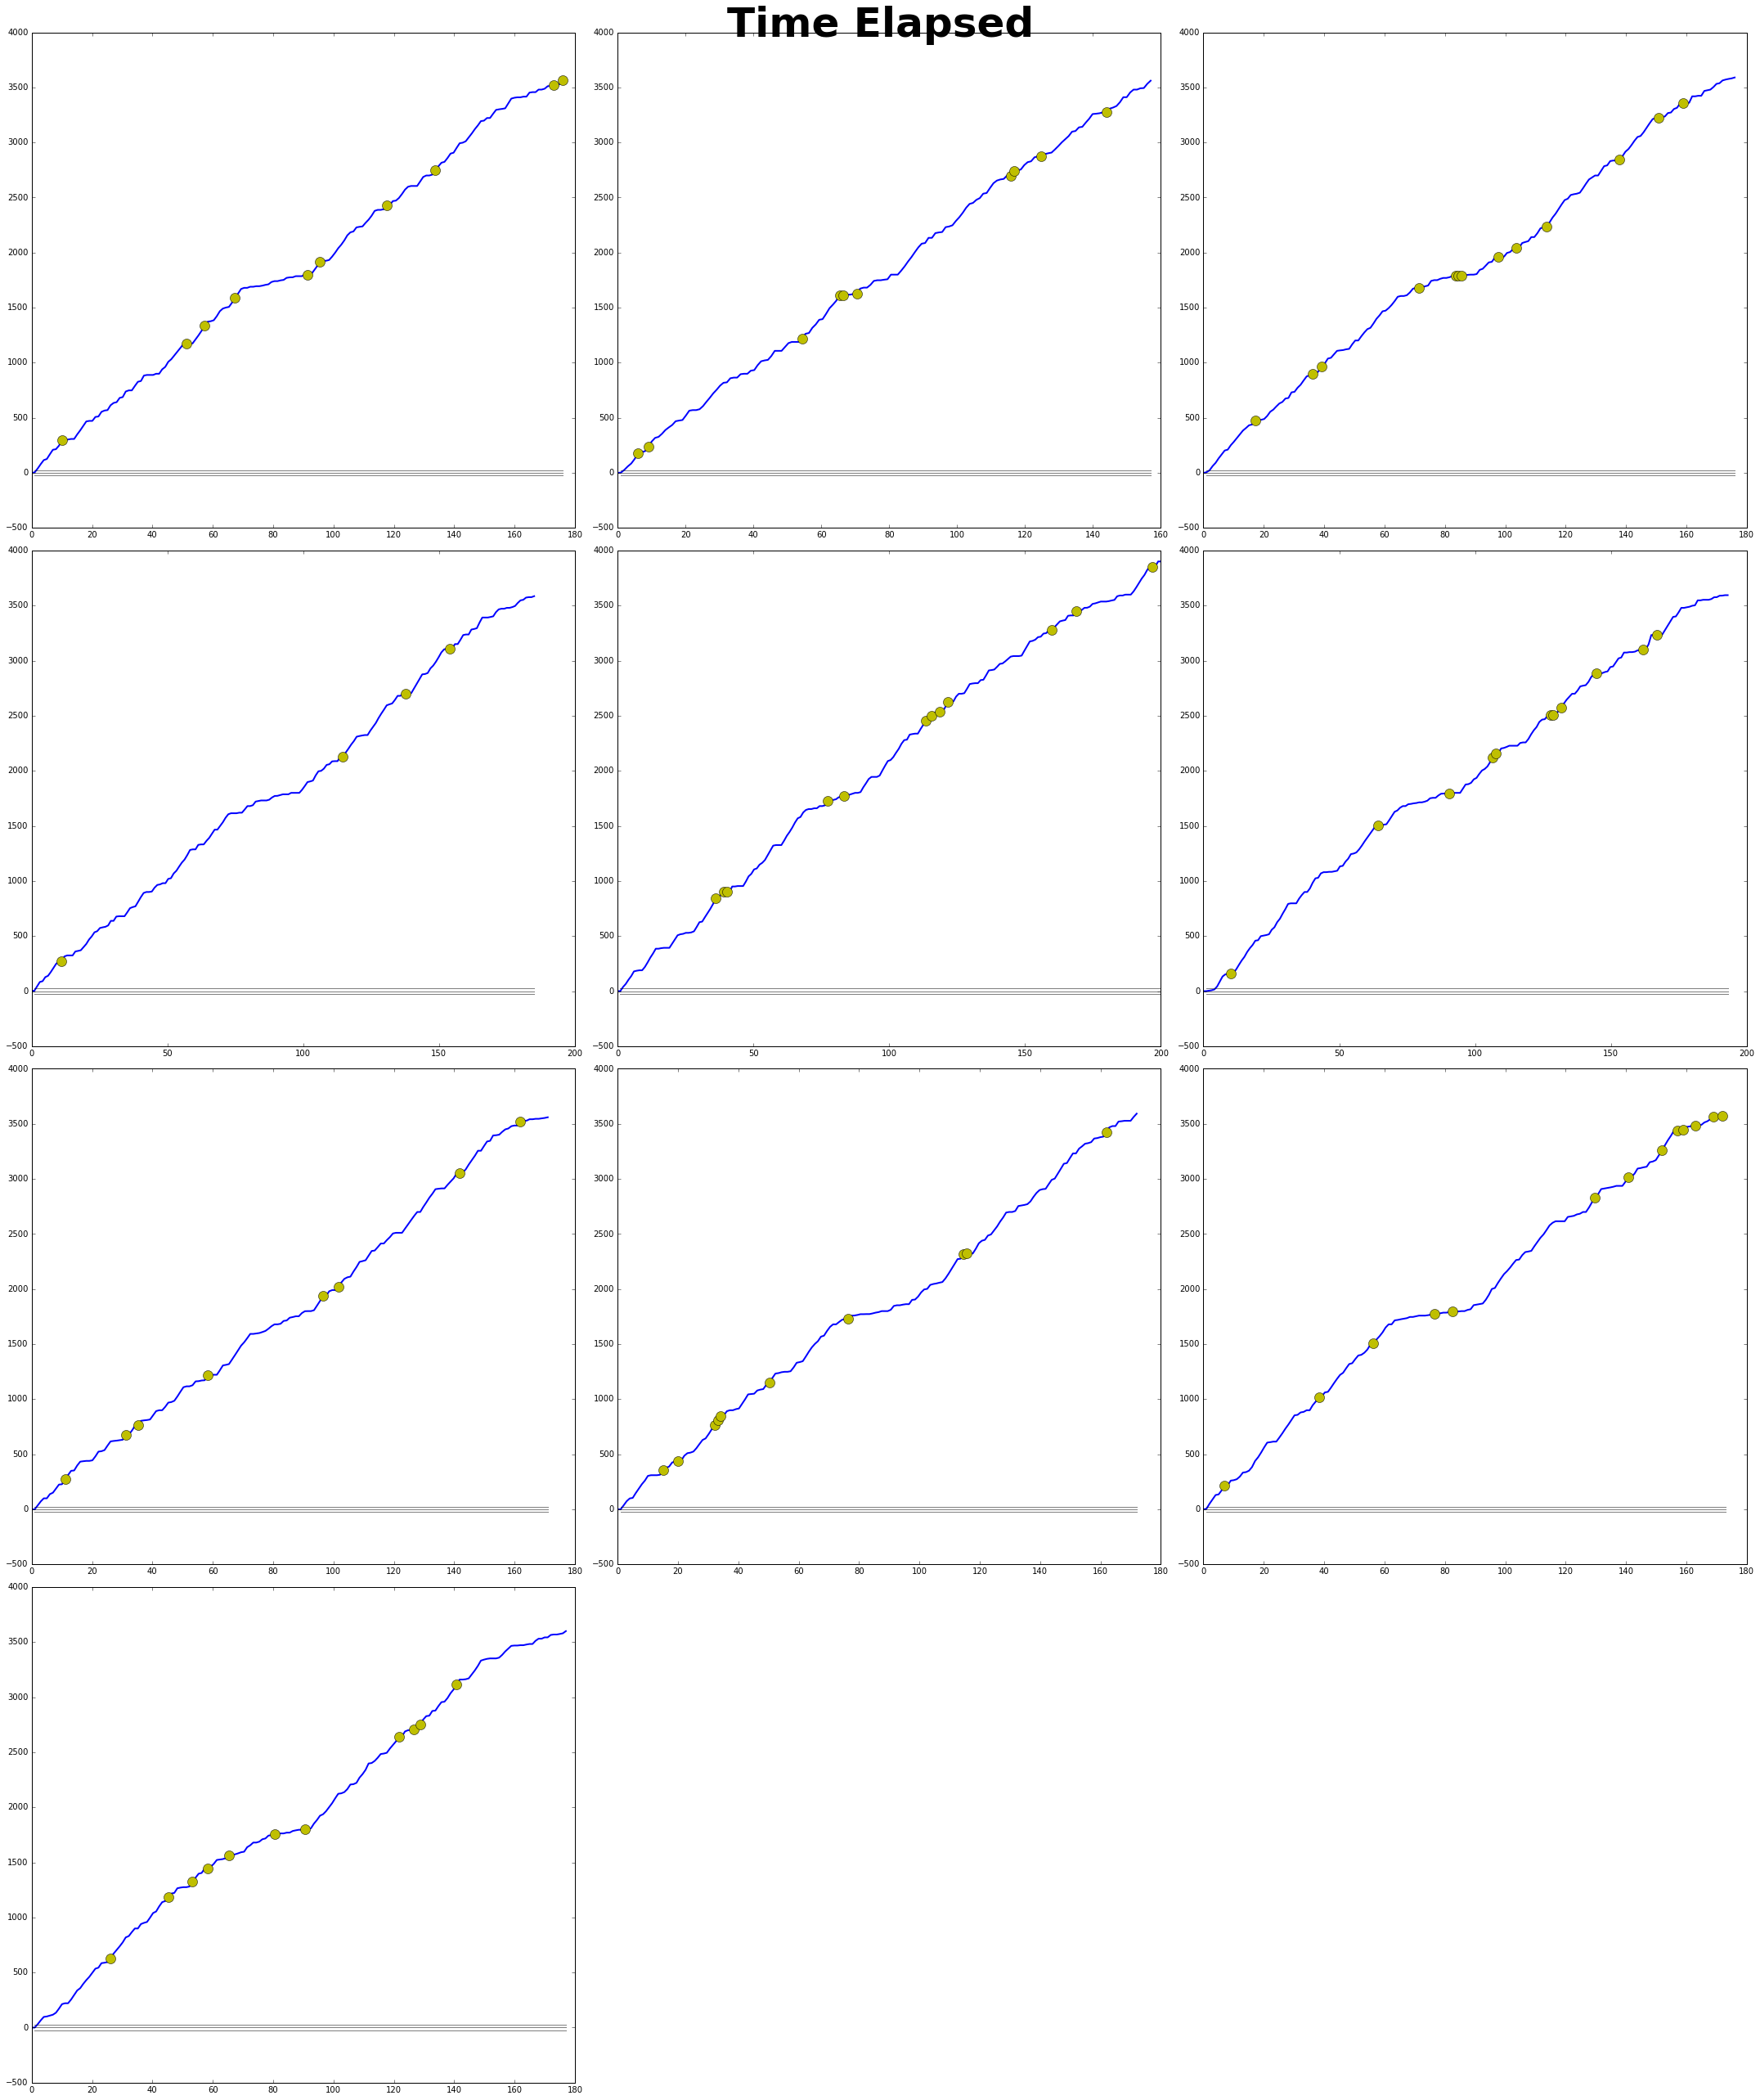

In [93]:
#Graph of Time Elapsed as a function of time
graph_by_game(10, time_elapsed, "Time Elapsed", penalties=True)

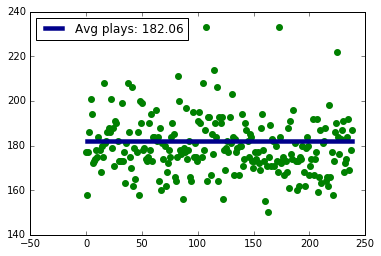

In [96]:
x2 = np.linspace(0,len(plays),len(plays))
plt.scatter(x2,plays, color="g", lw=2.5)

#Flat line of best fit
b,m=best_fit(x2,plays)
plt.plot(x2,x2/x2*b,"darkblue", label="Avg plays: 182.06", lw=4.5)
plt.legend(loc="upper left")
plt.show()

# Penalties

These plots just show 1 if there was a penalty on any given play, or 0 if not. 

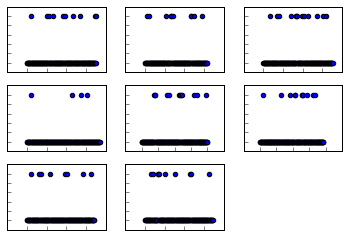

In [100]:
n=8
for i in xrange(n):
    plt.subplot(ceil(sqrt(n)),ceil(sqrt(n)),i+1)
    #plt.subplot(1,n,i+1)
    current_game = penalty[all_games[i]+1:all_games[i+1]]
    x3=np.linspace(0,len(current_game),len(current_game))
    plt.scatter(x3,current_game)

    plt.tick_params(which="both", top="off", right="off")
    plt.tick_params(labelbottom="off")
    plt.tick_params(labelleft="off")

plt.show()

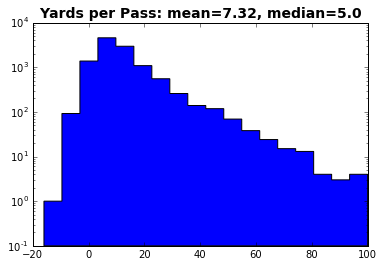

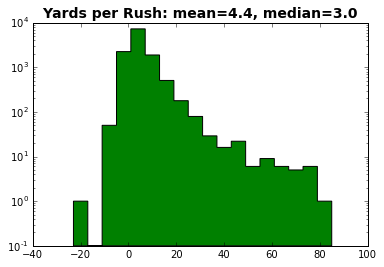

In [101]:
#First get an array of yards on every pass play
dummy = list(np.vstack((ispass,yards)).T)
yards_per_pass = list()  
nonzero_yards_per_pass = list()
for i in xrange(len(dummy)):
    if dummy[i][0]==1:
        yards_per_pass.append(dummy[i])
        if dummy[i][1]!=0:
            nonzero_yards_per_pass.append(dummy[i])

yards_per_pass = np.array(yards_per_pass)
nonzero_yards_per_pass = np.array(nonzero_yards_per_pass)
all_pass_yards = yards_per_pass[:,1]
min(all_pass_yards),max(all_pass_yards)

#Array of yards on every rush play
dummy2 = list(np.vstack((isrush,yards)).T)
yards_per_rush = list()  
nonzero_yards_per_rush = list()
for i in xrange(len(dummy2)):
    if dummy2[i][0]==1:
        yards_per_rush.append(dummy2[i])
        if dummy2[i][1]!=0:
            nonzero_yards_per_rush.append(dummy2[i])

yards_per_rush = np.array(yards_per_rush)
nonzero_yards_per_rush = np.array(nonzero_yards_per_rush)

#Histogram
#Yards per pass
plt.hist(nonzero_yards_per_pass[:,1], bins=18, histtype="stepfilled", log=True) #Log necessary?
plt.title("Yards per Pass: mean=7.32, median=5.0", fontsize=14, weight="bold")
plt.show()
#Yards per rush
plt.hist(yards_per_rush[:,1], bins=18, color="g", histtype="stepfilled", log=True)
plt.title("Yards per Rush: mean=4.4, median=3.0", fontsize=14, weight="bold")
plt.show()

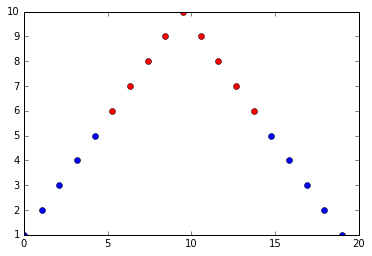

In [104]:
color_graph()